<a href="https://colab.research.google.com/github/Diyabaghla/Loan_Approval/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [42]:
train_data=pd.read_csv("/content/train.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
test_data=pd.read_csv("/content/test.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
train_data.shape

(614, 13)

In [46]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
train_data=train_data.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1)
test_data=test_data.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1)

In [49]:
train_data.isnull().sum()

Loan_ID               0
Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [50]:
train_data['LoanAmount']=train_data['LoanAmount'].fillna(0)
train_data['Depedents']=train_data['Dependents'].fillna(0)
#train_data['LoanAmount']=train_data['LoanAmount'].fillna(0)
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(0)
train_data['Credit_History']=train_data['Credit_History'].fillna(0)



In [51]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(0)
test_data['Depedents']=test_data['Dependents'].fillna(0)
#train_data['LoanAmount']=train_data['LoanAmount'].fillna(0)
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(0)
test_data['Credit_History']=test_data['Credit_History'].fillna(0)


In [52]:
train_data.isnull().sum()

Loan_ID               0
Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Loan_Status           0
Depedents             0
dtype: int64

In [53]:
train_data.columns


Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Depedents'],
      dtype='object')

In [54]:
train_data['Dependents']=train_data['Dependents'].fillna(0)

In [55]:
train_data.isnull().sum()

Loan_ID              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Depedents            0
dtype: int64

In [56]:
test_data.isnull().sum()

Loan_ID               0
Dependents           10
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Depedents             0
dtype: int64

In [57]:
test_data['Dependents']=test_data['Dependents'].fillna(0)

In [58]:
test_data.isnull().sum()

Loan_ID              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Depedents            0
dtype: int64

In [59]:
#now we will take x and y
features=['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History']
x=train_data[features]
y=train_data['Loan_Status']
x_val=x[features]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: xlabel='Loan_Status', ylabel='count'>

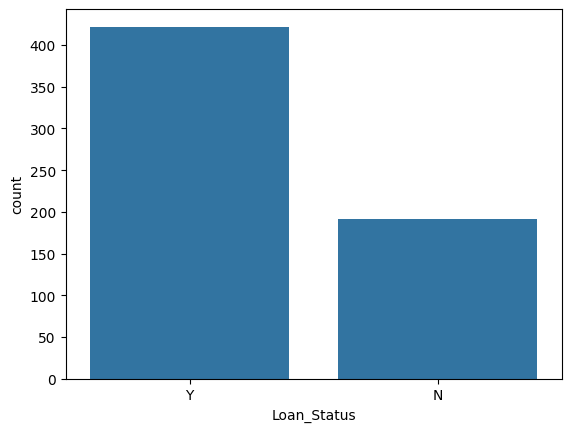

In [61]:
sns.countplot(x='Loan_Status',data=train_data)

<Axes: >

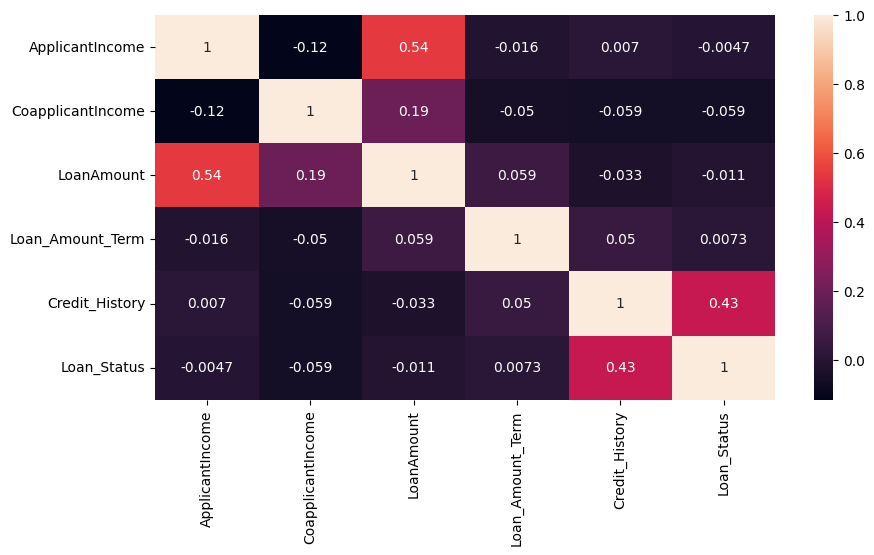

In [77]:
plt.figure(figsize=(10,5))
c=train_data.corr(numeric_only=True)
sns.heatmap(c,annot=True)

In [62]:
y.replace({'N':0,'Y':1},inplace=True)

In [63]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
#predicting the model
model_pred=model.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,model_pred)
print("accuracy is: ",accuracy)

accuracy is:  0.7560975609756098


In [70]:
x_val.replace({'N':0,'Y':1},inplace=True)

In [71]:
predictions=model.predict(x_val)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [76]:
# Predicting on a single sample
input_data = ( 1, 0,  94.0,  1.0, 2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)

# Displaying the prediction result
if prediction[0] == 1:
    print('Loan is approved')
else:
    print('Loan is not approved')

Loan is not approved
